In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import chardet

In [62]:
# Define main project folder
main = r'C:\Users\Do Thu An\OneDrive\Desktop\Dynamic Macroeconomics\Problem sets\Dynamic-Macroeconomics\PS2_Code'
# Set project folder as current working directory
os.chdir(main)
# Define data file path
data_path = os.path.join(main, 'Data Files', 'ES Panel Data')

In [63]:
# Get list of all CSV files
file_list = [f for f in os.listdir(data_path) if f.endswith('.csv')]

# Display the number of files found
print(f'Found {len(file_list)} CSV files in the VHLSS 2008 Data folder.')
for i, file_name in enumerate(file_list, 1):
    print(f'{i}: {file_name}')

Found 1 CSV files in the VHLSS 2008 Data folder.
1: ES_Vietnam_2005_2009_2015.csv


In [64]:
# Load ES Panel data
df = pd.read_csv(os.path.join(data_path, 'ES_Vietnam_2005_2009_2015.csv'), encoding='latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Columns: 977 entries, idstd2015 to _2005_q92c5
dtypes: float64(909), int64(16), object(52)
memory usage: 23.8+ MB


C:\Users\Do Thu An\AppData\Local\Temp\ipykernel_22764\2530249213.py:2: DtypeWarning: Columns (8,44,59,85,87,113,149,292,301,329,332,335,388,396,409,440,457,462,465,469,472,512,527,532,630,644,657,661,663,738) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_path, 'ES_Vietnam_2005_2009_2015.csv'), encoding='latin1')


In [65]:
# Calculate the median of the number of employees (l1)
l1_median = df['l1'].median()

# Re-categorize the firm size (a6a) into Small (1) and Large (2)
df['firm_size'] = df.apply(
    lambda row: 2 if (row['a6a'] in [2, 3] or row['l1'] > l1_median) else 1, axis=1
)

# Label small as 1, large as 2
# - 1 is small
# - 2 is large (medium + large or larger than median of employees)

# Print the value counts of the new firm size
print(df['firm_size'].value_counts())

firm_size
2    2161
1    1038
Name: count, dtype: int64


In [66]:
# Select Firms ID
col_id = ['idstd2015', 'id2015', 'idstd2005', 'id2005', 'firm_size'] 

#************************************************ YEAR 2015 ************************************************
# Select the variable cost of 2015
## d2: total annual sales for all products and services (VND)
# c9b: Annual losses due to power outages, d1a3: % of sales (d2) represented by main activity or product
# d10: Losses due to theft as % of the value of the products, d11: Losses due to breakage or spoilage as % of the value of the products
# h8: Cost of formal research and development activities, i2b: Total annual cost of security
# i4b: Total annual value of losses due to theft, robbery, vadalism 
# n2a: Total annual cost of labor, n2b: Total annual cost of electricity, n2i: Total annual cost of sales (for retails)
col_15A = ['c9b', 'd1a3', 'd2', 'd10', 'd11', 'i2b', 'i4b','n2a', 'n2b', 'n2i', 'n2e','n2f']

# Select production input of 2015 (Labor, Capital, Investment)
# LABOR - l1: Permanent, full-time workers end of last fiscal year, f2: Typical hours of operation in a week
# INVESTMENT - n5a: purchase of new or used machinery, vehicles, and equipment, n5b: lands & buildings, h8: Cost of formal research and development activities (innovation activities)
col_15B = ['n5a', 'n5b', '_2015_h8']

# Select financing variables OF 2015 (SECTION K. FINANCE)
# k1c: % Purchased on credit (loans), k2c: % Sold on credit (receivables)
col_15C = ['k1c', 'k2c']

#************************************************ YEAR 2005 ************************************************
# Select the variable cost of 2005 (Section II: Productivity)
# q86a1: Total sales, q86a2: Total cost
# q86a3: Total purchases of raw materials and intermediate goods, q86a4: Total cost of labor
# q86a5: Depreciation, q86a6: Rent on land and buildings, q86a8: Rent on machinery, equipment, and vehicles
# q86a9: Interest charges, q86a10: Energy cost, q86a11: Taxes
col_05A = ['_2005_q86a1', '_2005_q86a2','_2005_q86a3', '_2005_q86a4', '_2005_q86a5', '_2005_q86a6', 
           '_2005_q86a8', '_2005_q86a9', '_2005_q86a10', '_2005_q86a11']

# Select production input of 2005

# CAPITAL (ASSETS) - q91a1: Total fixed assets, q91a7: Total current assets (need to exclude receivables (q91a12))  
# INVESTMENT - q87a: net profits (after tax) in 2004, q87d: % of the establishment’s net profits (after tax) were reinvested in the establishment
col_05B = ['_2005_q91a1', '_2005_q91a7', '_2005_q91a12', '_2005_q87a', '_2005_q87d']

# Select financing variables of 2005 (SECTION III. PRODUCTIVITY)
# q91a12: Receivables

# Check if all selected columns exist in the dataset
columns = [col for col in col_id + col_15A + col_15B + col_15C + col_05A + col_05B if col in df.columns]

df = df[columns]
df.fillna(0, inplace = True)
# Replace all occurrences of -9 with 0 in the entire DataFrame
df.replace(-9, 0, inplace=True)
df.columns

Index(['idstd2015', 'id2015', 'idstd2005', 'id2005', 'firm_size', 'c9b',
       'd1a3', 'd2', 'd10', 'd11', 'i2b', 'i4b', 'n2a', 'n2b', 'n2i', 'n2e',
       'n2f', 'n5a', 'n5b', '_2015_h8', 'k1c', 'k2c', '_2005_q86a1',
       '_2005_q86a2', '_2005_q86a3', '_2005_q86a4', '_2005_q86a5',
       '_2005_q86a6', '_2005_q86a8', '_2005_q86a9', '_2005_q86a10',
       '_2005_q86a11', '_2005_q91a1', '_2005_q91a7', '_2005_q91a12',
       '_2005_q87a', '_2005_q87d'],
      dtype='object')

In [67]:
# Drop rows where 'a6a' (firm size) or 'l1' is NaN
#df.dropna(subset=['a6a', 'l1'], inplace=True)

# Define the columns for the 2015 and 2005 datasets
col_id = ['idstd2015', 'id2015', 'idstd2005', 'id2005', 'firm_size']

# ************************************************ YEAR 2015 ************************************************
# Select the relevant columns for 2015
col_15A = ['c9b', 'd1a3', 'd2', 'd10', 'd11', 'i2b', 'i4b','n2a', 'n2b', 'n2i', 'n2e','n2f']
col_15B = ['n5a', 'n5b', '_2015_h8']
col_15C = ['k1c', 'k2c']

# Select the 2015 data by including only the relevant columns
df_2015 = df[col_id + col_15A + col_15B + col_15C]
# Apply pd.to_numeric column by column (for the selected columns)
df_2015 = df_2015.apply( pd.to_numeric, errors='coerce')

# Calculate the costs based on the percentage of sales (d1a3, d10, d11) and total sales (d2)
df_2015['cost_main_activity'] = df_2015['d1a3'] * df_2015['d2'] / 100  # Main activity cost (percentage of sales)
df_2015['cost_theft'] = df_2015['d10'] * df_2015['d2'] / 100  # Losses due to theft
df_2015['cost_spoilage'] = df_2015['d11'] * df_2015['d2'] / 100  # Losses due to spoilage

# Calculate the finance based on purchases made on credit (k1c)
df_2015['total_vrcost'] = df_2015['n5a'] + df_2015['n5b'] + df_2015['_2015_h8']  # Total variable cost

# Finance based on credit purchases
df_2015['finance_on_credit'] = (df_2015['k1c'] / 100) * df_2015['total_vrcost']

# Finance based on sales on credit (receivables)
df_2015['finance_from_receivables'] = (df_2015['k2c'] / 100) * df_2015['total_vrcost']

# Rename the 'd2' column as 'total_revenue'
df_2015.rename(columns={'d2': 'total_revenue'}, inplace=True)

# Replace all occurrences of -9 with 0 in the entire DataFrame
df_2015.replace(-9, 0, inplace=True)


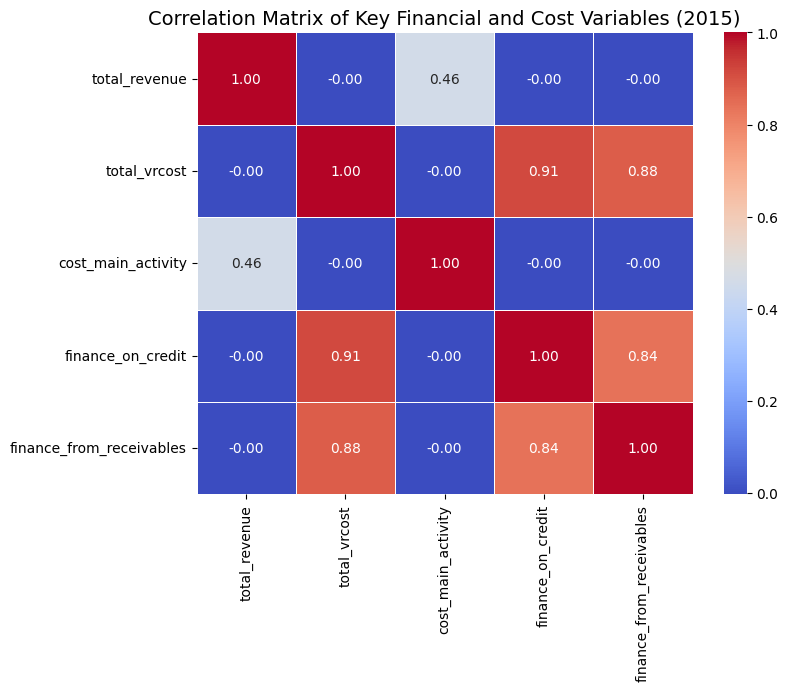

In [68]:
# Selecting variables to plot correlation
corr_vars = ['total_revenue', 'total_vrcost', 'cost_main_activity', 'finance_on_credit', 'finance_from_receivables']

# Calculate correlation matrix for the selected variables
corr_matrix = df_2015[corr_vars].corr()

# Define the path to save the figure
save_path = r"C:\Users\Do Thu An\OneDrive\Desktop\Dynamic Macroeconomics\Problem sets\Dynamic-Macroeconomics\PS2_Code\Firms Modelling\output\figures"
# Make sure the output directory exists
os.makedirs(save_path, exist_ok=True)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Matrix of Key Financial and Cost Variables (2015)', fontsize=14)

# Save the figure
figure_filename = os.path.join(save_path, "correlation_matrix_2015.png")
plt.savefig(figure_filename, dpi=300, bbox_inches='tight')
plt.show()

In [69]:
# Print the correlation matrix to the console
print("Correlation Matrix of Key Financial and Cost Variables (2015):")
print(corr_matrix)

Correlation Matrix of Key Financial and Cost Variables (2015):
                          total_revenue  total_vrcost  cost_main_activity  \
total_revenue                  1.000000     -0.002994            0.458292   
total_vrcost                  -0.002994      1.000000           -0.002331   
cost_main_activity             0.458292     -0.002331            1.000000   
finance_on_credit             -0.002143      0.914124           -0.001688   
finance_from_receivables      -0.002880      0.879512           -0.002359   

                          finance_on_credit  finance_from_receivables  
total_revenue                     -0.002143                 -0.002880  
total_vrcost                       0.914124                  0.879512  
cost_main_activity                -0.001688                 -0.002359  
finance_on_credit                  1.000000                  0.836500  
finance_from_receivables           0.836500                  1.000000  


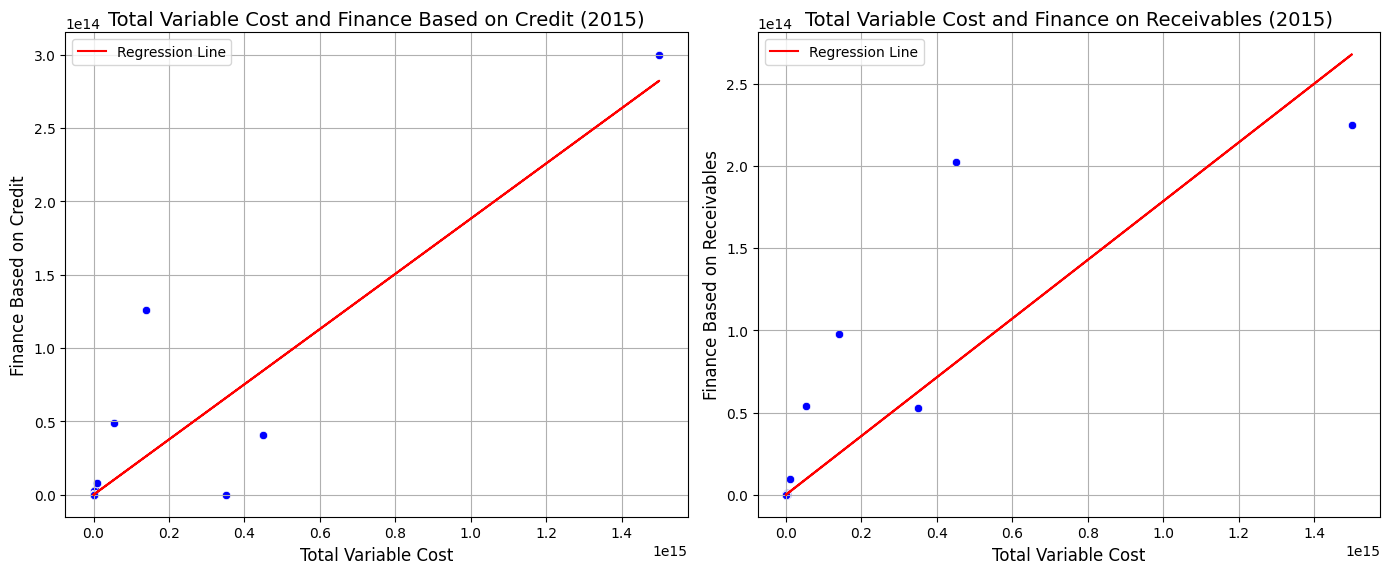

In [70]:
# Define save path
save_path = r"C:\Users\Do Thu An\OneDrive\Desktop\Dynamic Macroeconomics\Problem sets\Dynamic-Macroeconomics\PS2_Code\Firms Modelling\output\figures"
os.makedirs(save_path, exist_ok=True)

# Create a figure with 2 subplots (1 row, 2 columns)
plt.figure(figsize=(14, 6))

# First subplot: Scatterplot with regression line between total_vrcost and finance_on_credit
plt.subplot(1, 2, 1)
sns.scatterplot(x='total_vrcost', y='finance_on_credit', data=df_2015, color='blue')
plt.title('Total Variable Cost and Finance Based on Credit (2015)', fontsize=14)
plt.xlabel('Total Variable Cost', fontsize=12)
plt.ylabel('Finance Based on Credit', fontsize=12)
plt.grid(True)

# Fit regression model for the first subplot
X1 = df_2015['total_vrcost']
Y1 = df_2015['finance_on_credit']
X1 = sm.add_constant(X1)  # Add constant for the intercept
model1 = sm.OLS(Y1, X1, missing='drop').fit()  # Fit the model
predictions1 = model1.predict(X1)  # Make predictions

# Plot the regression line
plt.plot(df_2015['total_vrcost'], predictions1, color='red', label='Regression Line')
plt.legend()

# Second subplot: Scatterplot with regression line between total_vrcost and finance_from_receivables
plt.subplot(1, 2, 2)
sns.scatterplot(x='total_vrcost', y='finance_from_receivables', data=df_2015, color='blue')
plt.title('Total Variable Cost and Finance on Receivables (2015)', fontsize=14)
plt.xlabel('Total Variable Cost', fontsize=12)
plt.ylabel('Finance Based on Receivables', fontsize=12)
plt.grid(True)

# Fit regression model for the second subplot
X2 = df_2015['total_vrcost']
Y2 = df_2015['finance_from_receivables']
X2 = sm.add_constant(X2)  # Add constant for the intercept
model2 = sm.OLS(Y2, X2, missing='drop').fit()  # Fit the model
predictions2 = model2.predict(X2)  # Make predictions

# Plot the regression line
plt.plot(df_2015['total_vrcost'], predictions2, color='red', label='Regression Line')
plt.legend()

# Adjust layout
plt.tight_layout()

# Save the figure
figure_filename = os.path.join(save_path, "scatterplots_with_fitlines_2015.png")
plt.savefig(figure_filename, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [71]:
# Select the independent variables (X) and dependent variable (Y)
X = df_2015[['finance_on_credit', 'finance_from_receivables']]
Y = df_2015['total_vrcost']

# Add a constant (intercept) to X
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(Y, X).fit()

# Print the regression summary in LaTeX format
print(model.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}             &  total\_vrcost   & \textbf{  R-squared:         } &       0.880    \\
\textbf{Model:}                     &       OLS        & \textbf{  Adj. R-squared:    } &       0.879    \\
\textbf{Method:}                    &  Least Squares   & \textbf{  F-statistic:       } &   1.167e+04    \\
\textbf{Date:}                      & Mon, 28 Apr 2025 & \textbf{  Prob (F-statistic):} &       0.00     \\
\textbf{Time:}                      &     23:39:20     & \textbf{  Log-Likelihood:    } &  -1.0026e+05   \\
\textbf{No. Observations:}          &        3199      & \textbf{  AIC:               } &   2.005e+05    \\
\textbf{Df Residuals:}              &        3196      & \textbf{  BIC:               } &   2.005e+05    \\
\textbf{Df Model:}                  &           2      & \textbf{                     } &                \\
\textbf{Covariance Type:}           &    nonrobust     & \textbf{                     } & 

In [72]:
# ************************************************ YEAR 2005 ************************************************
# Select the relevant columns for 2005
col_05A = ['_2005_q86a1', '_2005_q86a2', '_2005_q86a3', '_2005_q86a4', '_2005_q86a5', '_2005_q86a6', 
           '_2005_q86a8', '_2005_q86a9', '_2005_q86a10', '_2005_q86a11']
col_05B = ['_2005_q91a1', '_2005_q91a7', '_2005_q91a12', '_2005_q87a', '_2005_q87d']

# Select the 2005 data by including only the relevant columns
df_2005 = df[col_id + col_05A + col_05B]

# Apply pd.to_numeric column by column (for the selected columns)
df_2005 = df_2005.apply( pd.to_numeric, errors='coerce')

# Replace all occurrences of -9 with NaN to handle missing or erroneous data
df_2005.replace(-9, float('nan'), inplace=True)

# Calculate the total value of reinvestment in the establishment
df_2005['total_reinvestment'] = df_2005['_2005_q87a'] * (df_2005['_2005_q87d'] / 100)

# Calculate total assets excluding receivables
df_2005['total_assets'] = df_2005['_2005_q91a1'] - df_2005['_2005_q91a12']

# Label 'q91a12' as receivables separately
df_2005['receivables'] = df_2005['_2005_q91a12']

# Select the relevant columns for the cost calculation
cost_columns = ['_2005_q86a3', '_2005_q86a4', '_2005_q86a5', '_2005_q86a6', '_2005_q86a8', '_2005_q86a9', '_2005_q86a10', '_2005_q86a11']

# Calculate the total cost by summing up the selected columns
df_2005['total_cost'] = df_2005[cost_columns].sum(axis=1)


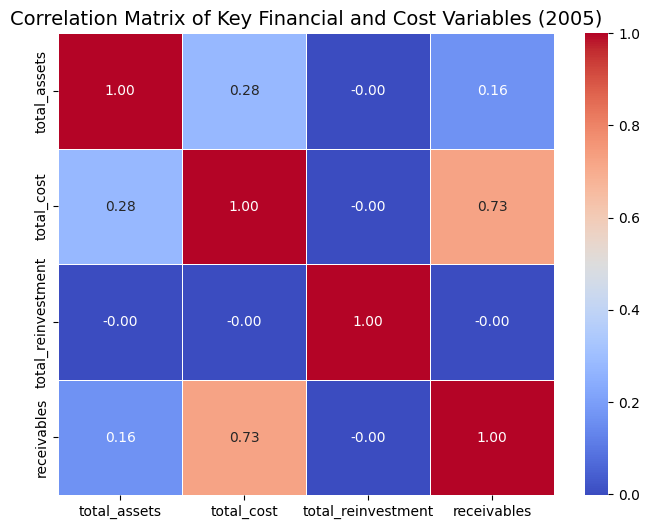

In [73]:
# Selecting variables to plot correlation
corr_vars2 = ['total_assets', 'total_cost', 'total_reinvestment', 'receivables']

# Calculate correlation matrix for the selected variables
corr_matrix2 = df_2005[corr_vars2].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Matrix of Key Financial and Cost Variables (2005)', fontsize=14)

# Save the figure to the specified path
output_path = r'C:\Users\Do Thu An\OneDrive\Desktop\Dynamic Macroeconomics\Problem sets\Dynamic-Macroeconomics\PS2_Code\Firms Modelling\output\figures\correlation_matrix_2005.png'
plt.savefig(output_path, format='png')

# Show the plot
plt.show()


In [74]:
# Print the correlation matrix to the console
print("Correlation Matrix of Key Financial and Cost Variables (2005):")
print(corr_matrix2)

Correlation Matrix of Key Financial and Cost Variables (2005):
                    total_assets  total_cost  total_reinvestment  receivables
total_assets            1.000000    0.279214           -0.000660     0.163068
total_cost              0.279214    1.000000           -0.002291     0.725555
total_reinvestment     -0.000660   -0.002291            1.000000    -0.001951
receivables             0.163068    0.725555           -0.001951     1.000000


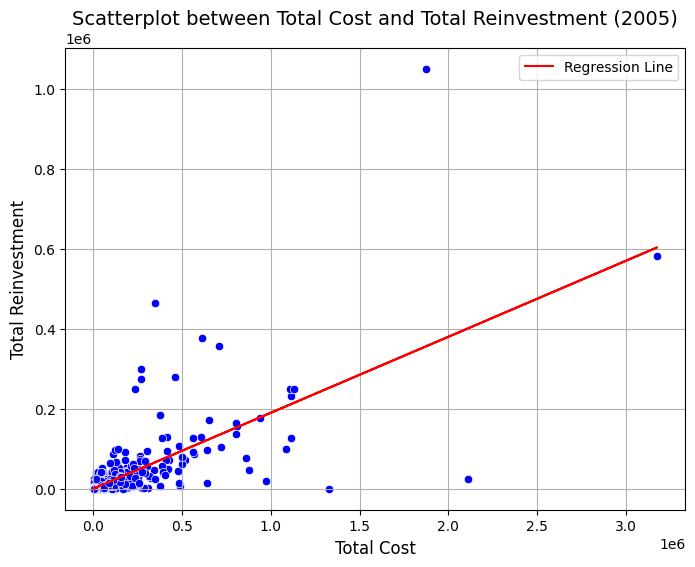

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &   receivables    & \textbf{  R-squared:         } &      0.526    \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &      0.526    \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &      3554.    \\
\textbf{Date:}             & Mon, 28 Apr 2025 & \textbf{  Prob (F-statistic):} &      0.00     \\
\textbf{Time:}             &     23:39:23     & \textbf{  Log-Likelihood:    } &    -36349.    \\
\textbf{No. Observations:} &        3199      & \textbf{  AIC:               } &  7.270e+04    \\
\textbf{Df Residuals:}     &        3197      & \textbf{  BIC:               } &  7.271e+04    \\
\textbf{Df Model:}         &           1      & \textbf{                     } &               \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &               \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                     

In [75]:
# Select relevant columns for plotting
df_2005_subset = df_2005[['total_cost', 'receivables']]

# Plot the scatter plot for total_cost vs receivables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_cost', y='receivables', data=df_2005_subset, color='blue')
plt.title('Scatterplot between Total Cost and Total Reinvestment (2005)', fontsize=14)
plt.xlabel('Total Cost', fontsize=12)
plt.ylabel('Total Reinvestment', fontsize=12)
plt.grid(True)

# Add regression line
X = df_2005_subset['total_cost']
Y = df_2005_subset['receivables']
X = sm.add_constant(X)  # Add constant for the intercept
model = sm.OLS(Y, X, missing='drop').fit()  # Fit the model
predictions = model.predict(X)  # Make predictions

# Plot the regression line
plt.plot(df_2005_subset['total_cost'], predictions, color='red', label='Regression Line')

# Add legend
plt.legend()

# Save the figure to the specified path
output_path = r'C:\Users\Do Thu An\OneDrive\Desktop\Dynamic Macroeconomics\Problem sets\Dynamic-Macroeconomics\PS2_Code\Firms Modelling\output\figures\scatter_plot_with_regression_2005.png'
plt.savefig(output_path, format='png')

# Show the plot
plt.show()

# Print the regression summary in LaTeX format
print(model.summary().as_latex())